<a href="https://colab.research.google.com/github/H-C-21/Assessment-2/blob/main/Copy_of_Harshit_(Random_Experimentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deeplake

In [2]:
import numpy as np
import os
import torch
import csv
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import torchvision
import torchvision.transforms as T


from torchvision import datasets, transforms, models

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
url='/content/drive/MyDrive/BTP/'
files = os.listdir(url)
files

['Results', 'Code', 'Model', 'Dataset']

In [5]:
# use GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [33]:
import deeplake
ds = deeplake.load('hub://activeloop/chest-xray-train')
ds_test = deeplake.load('hub://activeloop/chest-xray-test')

\

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/chest-xray-train



/

hub://activeloop/chest-xray-train loaded successfully.



-

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/chest-xray-test



/

hub://activeloop/chest-xray-test loaded successfully.



In [78]:
ds.summary()

Dataset(path='hub://activeloop/chest-xray-train', read_only=True, tensors=['images', 'labels', 'person_num'])

   tensor       htype                  shape                dtype  compression
  -------      -------                -------              -------  ------- 
   images       image     (5216, 127:2663, 384:2916, 1:3)   uint8     png   
   labels    class_label             (5216, 1)             uint32    None   
 person_num    generic              (5216, 0:1)             int32    None   


In [ ]:
ds_test.summary()

In [80]:
tform = transforms.Compose([
    transforms.ToPILImage(), # Must convert to PIL image for subsequent operations to run
    # transforms.ToTensor(),
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(), # Must convert to pytorch tensor for subsequent operations to run
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),

])
#PyTorch Dataloader
dataloader= ds.pytorch(batch_size = 1, num_workers = 2,
    transform = {'images': tform, 'labels': None}, shuffle = False)

dataloader_test = ds_test.pytorch(batch_size = 32, num_workers = 2,
    transform = {'images': tform, 'labels': None}, shuffle = False)



# dataloader = ds.pytorch(num_workers=0, batch_size=32, shuffle=False)

/usr/local/lib/python3.10/dist-packages/deeplake/integrations/pytorch/common.py:137: UserWarning: Decode method for tensors ['images'] is defaulting to numpy. Please consider specifying a decode_method in .pytorch() that maximizes the data preprocessing speed based on your transformation.
  warnings.warn(
Please wait, filling up the shuffle buffer with samples.:   0%|          | 0.00/1.91G [58:57<?, ?B/s]


In [81]:
# Get a batch of images
image_batch, label_batch = next(iter(dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label



(torch.Size([3, 224, 224]), tensor([0]))

In [82]:
trainData=np.load(url+'Dataset/Chest-XRay-TrainLabel.npy')
trainData.shape

(783, 1)

In [84]:
def export_dataloader_to_npy(dataloader, save_path, save_path2):
    data_arrays = []
    label_arrays = []
    for batch in dataloader:
        # Convert batch to numpy array
        numpy_array = batch['images'].numpy()
        label_array = batch['labels'].numpy()
        data_arrays.append(numpy_array)
        label_arrays.append(label_array)

    # Concatenate arrays along the batch dimension
    data = np.concatenate(data_arrays, axis=0)
    dataLabel = np.concatenate(label_arrays,axis = 0)
    # Save the data to .npy file
    np.save(save_path, data)
    np.save(save_path2,dataLabel)

# Example usage:
# Assuming dataloader is your PyTorch DataLoader instance
# and save_path is the path where you want to save the data
# export_dataloader_to_npy(dataloader, "data.npy")

# export_dataloader_to_npy(dataloader_test, url+'Dataset/Chest-XRay-TestData.npy',url +'Dataset/Chest-XRay-TestLabel.npy')
export_dataloader_to_npy(dataloader,url+'Dataset/Chest-XRay-TrainData.npy', url+'Dataset/Chest-XRay-TrainLabel.npy')

/usr/local/lib/python3.10/dist-packages/deeplake/integrations/pytorch/common.py:137: UserWarning: Decode method for tensors ['images'] is defaulting to numpy. Please consider specifying a decode_method in .pytorch() that maximizes the data preprocessing speed based on your transformation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/deeplake/integrations/pytorch/common.py:137: UserWarning: Decode method for tensors ['images'] is defaulting to numpy. Please consider specifying a decode_method in .pytorch() that maximizes the data preprocessing speed based on your transformation.
  warnings.warn(


torch.Size([3, 224, 224])


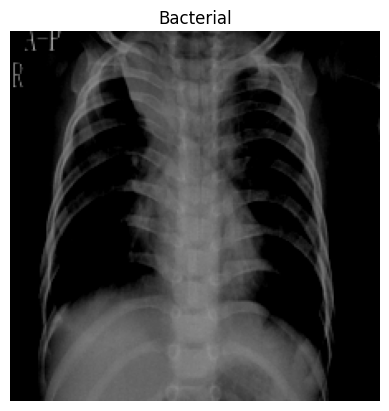

In [60]:
import matplotlib.pyplot as plt
class_names = ["Normal","Bacterial","Viral"]
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

print(image.shape)

In [65]:
pretrained = True
print(device)

epoch=0
numepochs = 100

cpu


In [62]:
modelNames=['vgg16','vgg19','resnet18','alexnet','googlenet','densenet121','efficientnet_b0','mnasnet1_0','mobilenet_v2','mobilenet_v3_small','shufflenet_v2_x0_5']
pretrained=True
output=3

In [63]:
files = os.listdir(url+"Model/")
if len(files) == 0:
    print('Directory is empty')
    temp=0
else:
    if f"{modelNames[0]}.pth" in files:
      temp = 1
      print("Found Checkpoint for Current Model")



In [ ]:
model = torchvision.models.densenet121(pretrained)
model.classifier2 = nn.Linear(1024,output)

In [ ]:
model.features

In [ ]:
for i in range(1,11):
  modelName=modelNames[i]
  print(modelName)
  if modelName=='vgg16':
    model = torchvision.models.vgg16(pretrained)
    model.classifier[6] = nn.Linear(4096,output)
  elif modelName=='resnet18':
    model = torchvision.models.resnet18(pretrained)
    model.fc = nn.Linear(512,output)
  elif modelName=='vgg19':
    model = torchvision.models.vgg19(pretrained)
    model.classifier[6] = nn.Linear(4096,output)
  elif modelName=='alexnet':
    model = torchvision.models.alexnet(pretrained)
    model.classifier[6] = nn.Linear(4096,output)
  elif modelName=='googlenet':
    model = torchvision.models.googlenet(pretrained)
    model.fc = nn.Linear(1024,output)
  elif modelName=='densenet121':
    model = torchvision.models.densenet121(pretrained)
    model.classifier2 = nn.Linear(1024,output)
  elif modelName=='efficientnet_b0':
    model = torchvision.models.efficientnet_b0(pretrained)
    model.classifier[1] = nn.Linear(1280,output)
  elif modelName=='mnasnet1_0':
    model = torchvision.models.mnasnet1_0(pretrained)
    model.classifier[1] = nn.Linear(1280,output)
  elif modelName=='mobilenet_v2':
    model = torchvision.models.mobilenet_v2(pretrained)
    model.classifier[1] = nn.Linear(1280,output)
  elif modelName=='mobilenet_v3_small':
    model = torchvision.models.mobilenet_v3_small(pretrained)
    model.classifier[3] = nn.Linear(1024,output)
  elif modelName=='shufflenet_v2_x0_5':
    model = torchvision.models.shufflenet_v2_x0_5(pretrained)
    model.fc = nn.Linear(1024,output)

  model.to(device);
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(),lr=0.001,momentum=.9)
  epoch=0

  temp=0

  trainLoss = torch.zeros(numepochs)
  testLoss  = torch.zeros(numepochs)

  trainAcc  = torch.zeros(numepochs)
  testAcc   = torch.zeros(numepochs)

  dir_path = url+f"Model/{modelName}.pth"

  files = os.listdir(url+"Model/")

  if len(files) == 0:
    print('Directory is empty')
    temp=0
  else:
    if f"{modelName}.pth" in files:
      temp =
      print("Found Checkpoint for Current Model")



  if temp:
    loaded_checkpoint = torch.load(dir_path)
    model.load_state_dict(loaded_checkpoint['model_state_dict'])
    epoch=loaded_checkpoint['epoch']
    print(epoch)


  # loop over epochs
  if not temp:
    with open(url+'Results/ResultsFin.csv', 'a', newline='') as csvfile:
      # Create a writer object
      writer = csv.writer(csvfile, delimiter=',')

      # Write the column headers
      writer.writerow(['Model','Pretrained','Epoch','TrainLoss', 'TestLoss', 'TrainAcc','TestAcc'])

  for epochi in range(epoch,numepochs):
    print(f"Start of Epoch {epochi+1}")
    model.train() # switch to train mode
    batchLoss = []
    batchAcc  = []
    for X,y in dataloader:
      X = X.to(device)
      y = y.to(device)
      # print(y.shape)

      yHat = model(X)
      # print(yHat)
      y = y.view(-1)
      loss = lossfun(yHat,y)


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


      batchLoss.append(loss.item())

      batchAcc.append( torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )

    trainLoss[epochi] = np.mean(batchLoss)

    trainAcc[epochi]  = 100*np.mean(batchAcc)


      #### test performance (here done in batches!)
    model.eval() # switch to test mode
    batchAcc  = []
    batchLoss = []
    for X,y in dataloader_test:

      X = X.to(device)
      y = y.to(device)
      y = y.view(-1)

      print(X.shape)
      with torch.no_grad():
        yHat = model(X)
        loss = lossfun(yHat,y)


      batchLoss.append(loss.item())
      batchAcc.append( torch.mean((torch.argmax(yHat,axis=1) == y).float()).item())

    testLoss[epochi] = np.mean(batchLoss)
    testAcc[epochi]  = 100*np.mean(batchAcc)


    print(f'Finished epoch {epochi+1}/{numepochs}. Test accuracy = {testAcc[epochi]:.2f}%')
    if((epochi+1)%200==0):
        checkpoint={'model_state_dict':model.state_dict(),'epoch':epochi+1}
        torch.save(checkpoint, dir_path)



    with open(url+'Results/ResultsFin.csv', 'a', newline='') as csvfile:

        writer = csv.writer(csvfile, delimiter=',')

        # writer.writerow(['model','Pretrained','epchi','trainLoss', 'testLoss', 'trainAcc','testAcc'])
        # # writer.writerow(['model',trainLoss, testLoss, trainAcc, testAcc])

        trainLossn=trainLoss.numpy()
        testLossn=testLoss.numpy()
        trainAccn=trainAcc.numpy()
        testAccn=testAcc.numpy()
        i = epochi
        writer.writerow([modelName, pretrained, i, trainLossn[i], testLossn[i], trainAccn[i], testAccn[i]])

In [ ]:
testAcc

In [ ]:
num_epochs = list(range(1, 16))
plt.plot(num_epochs, testAcc, marker='o')
plt.title('DenseNet121 - 522 TrainSet')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
#name of the model
modelNames=['vgg16','vgg19','resnet18','alexnet','googlenet','densenet121']
pretrained=True
output=3


In [69]:
model = torchvision.models.vgg16(pretrained)
model.classifier[6] = nn.Linear(4096,output)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 160MB/s]


In [72]:
print(model.features)
image.shape

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

torch.Size([3, 224, 224])

In [ ]:
for i in range(1,10):
  modelName=modelNames[i]
  print(modelName)
  if modelName=='vgg16':
    model = torchvision.models.vgg16(pretrained)
    model.classifier[6] = nn.Linear(4096,output)
  elif modelName=='resnet18':
    model = torchvision.models.resnet18(pretrained)
    model.fc = nn.Linear(512,output)
  elif modelName=='vgg19':
    model = torchvision.models.vgg19(pretrained)
    model.classifier[6] = nn.Linear(4096,output)
  elif modelName=='alexnet':
    model = torchvision.models.alexnet(pretrained)
    model.classifier[6] = nn.Linear(4096,output)
  elif modelName=='googlenet':
    model = torchvision.models.googlenet(pretrained)
    model.fc = nn.Linear(1024,output)
  elif modelName=='densenet121':
    model = torchvision.models.densenet121(pretrained)
    model.classifier2 = nn.Linear(1024,output)
  elif modelName=='efficientnet_b0':
    model = torchvision.models.efficientnet_b0(pretrained)
    model.classifier[1] = nn.Linear(1280,output)
  elif modelName=='mnasnet1_0':
    model = torchvision.models.mnasnet1_0(pretrained)
    model.classifier[1] = nn.Linear(1280,output)
  elif modelName=='mobilenet_v2':
    model = torchvision.models.mobilenet_v2(pretrained)
    model.classifier[1] = nn.Linear(1280,output)
  elif modelName=='mobilenet_v3_small':
    model = torchvision.models.mobilenet_v3_small(pretrained)
    model.classifier[3] = nn.Linear(1024,output)
  elif modelName=='shufflenet_v2_x0_5':
    model = torchvision.models.shufflenet_v2_x0_5(pretrained)
    model.fc = nn.Linear(1024,output)


  # push the model to the GPU (if using)
  model.to(device);
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(),lr=0.001,momentum=.9)
  epoch=0

  #url='/content/drive/MyDrive/IIITS/BTP-2023/2023/B23RKS01(Sai Ramya)/'
  # url='/media/rsrs/disk1/DrRKS/Transfer Learning/Agriculture/'
  # dir_path = url+'Saved-Model/'

  # Get a list of files and directories in the specified directory
  # files = os.listdir(dir_path)

  # Check if the directory is empty
  # if len(files) == 0:
  #     print('Directory is empty')
  #     temp=0
  # else:
  #     print('Directory is not empty')
  #     temp=0


  # if temp:
    # loaded_checkpoint = torch.load(url+'Saved-Model/my_model_checkpoint.pth')
    # model.load_state_dict(loaded_checkpoint['model_state_dict'])
    # epoch=loaded_checkpoint['epoch']
    # print(epoch)

  numepochs = 10

  # initialize losses
  trainLoss = torch.zeros(numepochs)
  testLoss  = torch.zeros(numepochs)

  trainAcc  = torch.zeros(numepochs)
  testAcc   = torch.zeros(numepochs)

  # loop over epochs
  for epochi in range(epoch,numepochs):

    # loop over training data batches
    model.train() # switch to train mode
    batchLoss = []
    batchAcc  = []
    for X,y in dataloader:

      # push data to GPU
      X = X.to(device)
      y = y.to(device)

      # forward pass and loss
      yHat = model(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss and accuracy from this batch
      batchLoss.append(loss.item())

      batchAcc.append( torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
    # end of batch loop...

    # and get average losses and accuracies across the batches
    trainLoss[epochi] = np.mean(batchLoss)

    trainAcc[epochi]  = 100*np.mean(batchAcc)


    #### test performance (here done in batches!)
    model.eval() # switch to test mode
    batchAcc  = []
    batchLoss = []
    for X,y in dataloader_test:

      # push data to GPU
      X = X.to(device)
      y = y.to(device)

      # forward pass and loss
      with torch.no_grad():
        yHat = model(X)
        loss = lossfun(yHat,y)

      # loss and accuracy from this batch
      batchLoss.append(loss.item())
      batchAcc.append( torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
    # end of batch loop...

    # and get average losses and accuracies across the batches
    testLoss[epochi] = np.mean(batchLoss)
    testAcc[epochi]  = 100*np.mean(batchAcc)

    # print out a status update
    print(f'Finished epoch {epochi+1}/{numepochs}. Test accuracy = {testAcc[epochi]:.2f}%')
    if((epochi+1)%500==0):
      checkpoint={
        'model_state_dict':model.state_dict(),
        'epoch':epochi+1
        }
      torch.save(checkpoint, url+'Saved-Model/my_model_checkpoint.pth')




  # Open the CSV file for writing
  # with open(url+'Results/6_June_2023/Tomato_LHE_Vs_Potato_LHE.csv', 'a', newline='') as csvfile:
  #     # Create a writer object
  #     writer = csv.writer(csvfile, delimiter=',')

  #     # Write the column headers
  #     writer.writerow(['model','Pretrained','epchi','trainLoss', 'testLoss', 'trainAcc','testAcc'])
  #     # writer.writerow(['model',trainLoss, testLoss, trainAcc, testAcc])

  #     trainLossn=trainLoss.numpy()
  #     testLossn=testLoss.numpy()
  #     trainAccn=trainAcc.numpy()
  #     testAccn=testAcc.numpy()


  #     # # Write the data to the CSV file
  #     for i in range(len(trainLossn)):
  #         writer.writerow([modelName,pretrained, i,trainLossn[i], testLossn[i], trainAccn[i], testAccn[i]])